# Броуновское движение (Brownian motion)
### Броуновское движение - это хаотичное, непрерывное движение мельчайших частиц, взвешенных в жидкости или газе. Представьте себе пылинки в солнечном луче или чаинки в стакане с водой — они постоянно дёргаются и перемещаются в случайных направлениях

### Это происходит потому, что молекулы жидкости или газа невидимо для глаза постоянно сталкиваются с этими частицами. Молекулы ударяют по частице со всех сторон, но неравномерно: иногда с одной стороны ударов больше, чем с другой. Из-за этой неравномерности частица получает толчок и движется в случайном направлении, пока не получит новый толчок


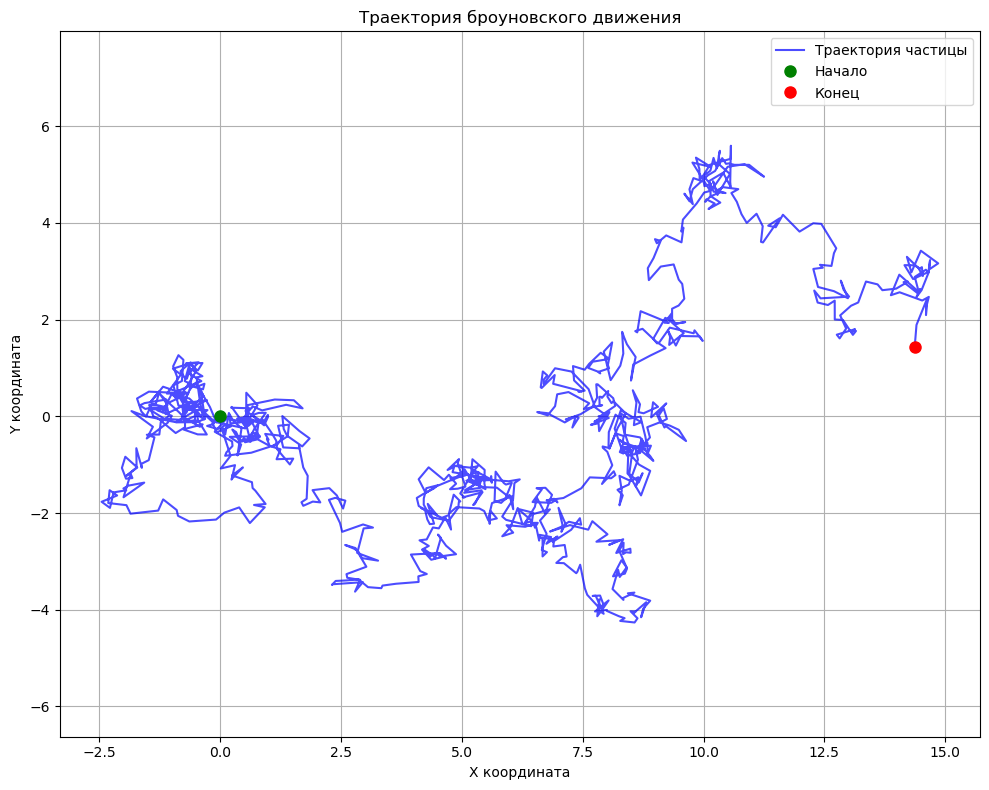

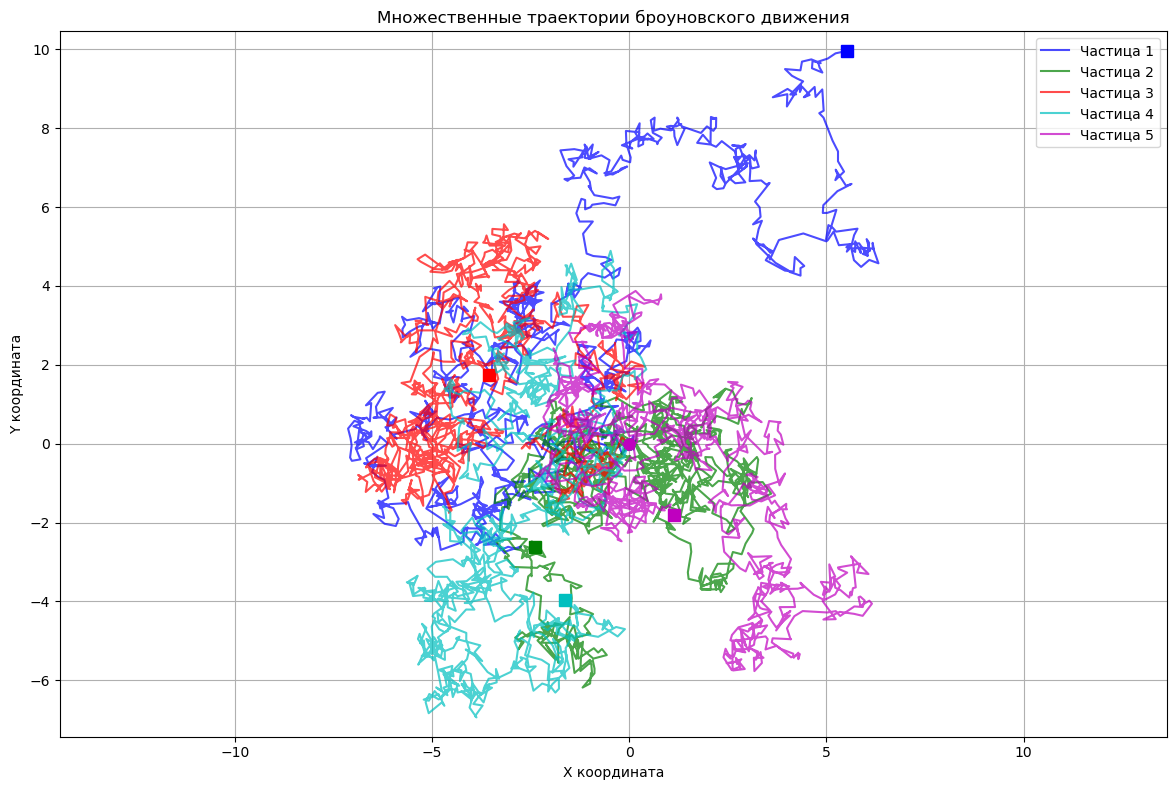

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры симуляции
n_steps = 1000  # Количество шагов
dt = 0.1  # Временной шаг
D = 0.2  # Коэффициент диффузии (сила случайных толчков)

# Создаем начальное положение частицы
x0, y0 = 0, 0

# Функция для генерации броуновского пути
def generate_brownian_path(n_steps, dt, D):
    # Генерация случайных смещений из нормального распределения
    # Стандартное отклонение зависит от коэффициента диффузии и времени
    dx = np.random.normal(0, np.sqrt(2*D*dt), n_steps)
    dy = np.random.normal(0, np.sqrt(2*D*dt), n_steps)
    
    # Создаем массивы для хранения координат
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    
    # Задаем начальное положение
    x[0], y[0] = x0, y0
    
    # Вычисляем позиции частицы на каждом шаге
    for i in range(n_steps):
        x[i+1] = x[i] + dx[i]
        y[i+1] = y[i] + dy[i]
        
    return x, y

# Генерируем путь
x, y = generate_brownian_path(n_steps, dt, D)

# Создаем график
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b-', alpha=0.7, linewidth=1.5, label='Траектория частицы')
plt.plot(x[0], y[0], 'go', markersize=8, label='Начало')
plt.plot(x[-1], y[-1], 'ro', markersize=8, label='Конец')
plt.title('Траектория броуновского движения')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Чтобы масштаб по осям был одинаковым
plt.tight_layout()
plt.show()

# Визуализируем также несколько разных траекторий
plt.figure(figsize=(12, 8))

# Генерируем и отображаем 5 разных траекторий
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    x, y = generate_brownian_path(n_steps, dt, D)
    plt.plot(x, y, color=colors[i], alpha=0.7, linewidth=1.5, label=f'Частица {i+1}')
    plt.plot(x[0], y[0], 'o', color=colors[i], markersize=8)
    plt.plot(x[-1], y[-1], 's', color=colors[i], markersize=8)

plt.title('Множественные траектории броуновского движения')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

# Геометрическое броуновское движение

### Геометрическое броуновское движение (ГБД) — это математическая модель, которая описывает случайные изменения цен активов на финансовых и крипто рынках. В отличие от обычного броуновского движения, которое может принимать отрицательные значения, ГБД всегда остается положительным, что соответствует реальным ценам активов

$dSt​=μSt​dt+σSt​dWt​$, где:
* dWt​ — приращение винеровского процесса (броуновского движения)

Если обычное броуновское движение добавляет случайные приращения к предыдущему значению, то геометрическое броуновское движение добавляет случайный процент от текущего значения. Это означает, что:

* Волатильность (размах колебаний) пропорциональна текущему уровню цены — чем выше цена, тем больше абсолютные колебания
* Цены никогда не упадут ниже нуля
* Изменения выражаются в процентах, а не в абсолютных величинах

### ГБД лежит в основе знаменитой модели Блэка-Шоулза для оценки опционов и широко используется в финансовом моделировании, управлении рисками и алгоритмической торговле

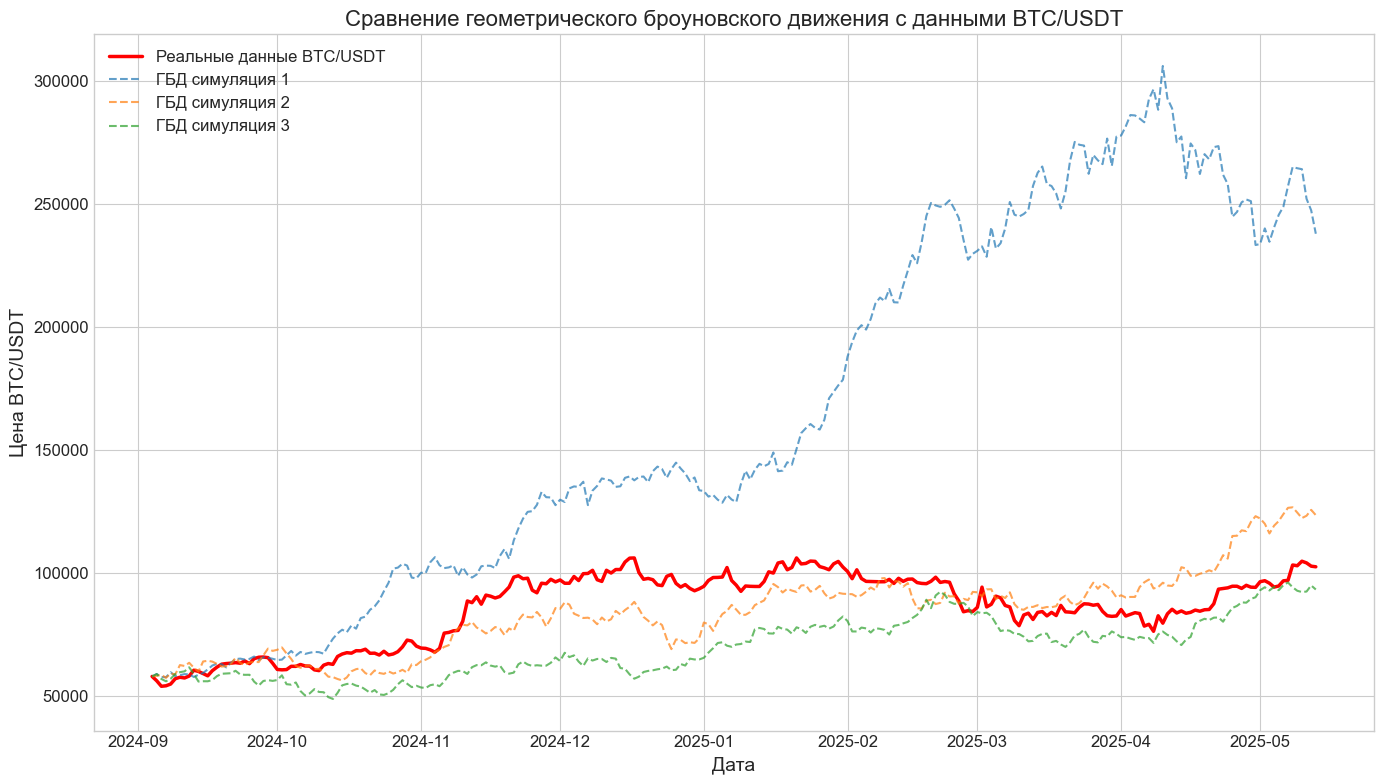

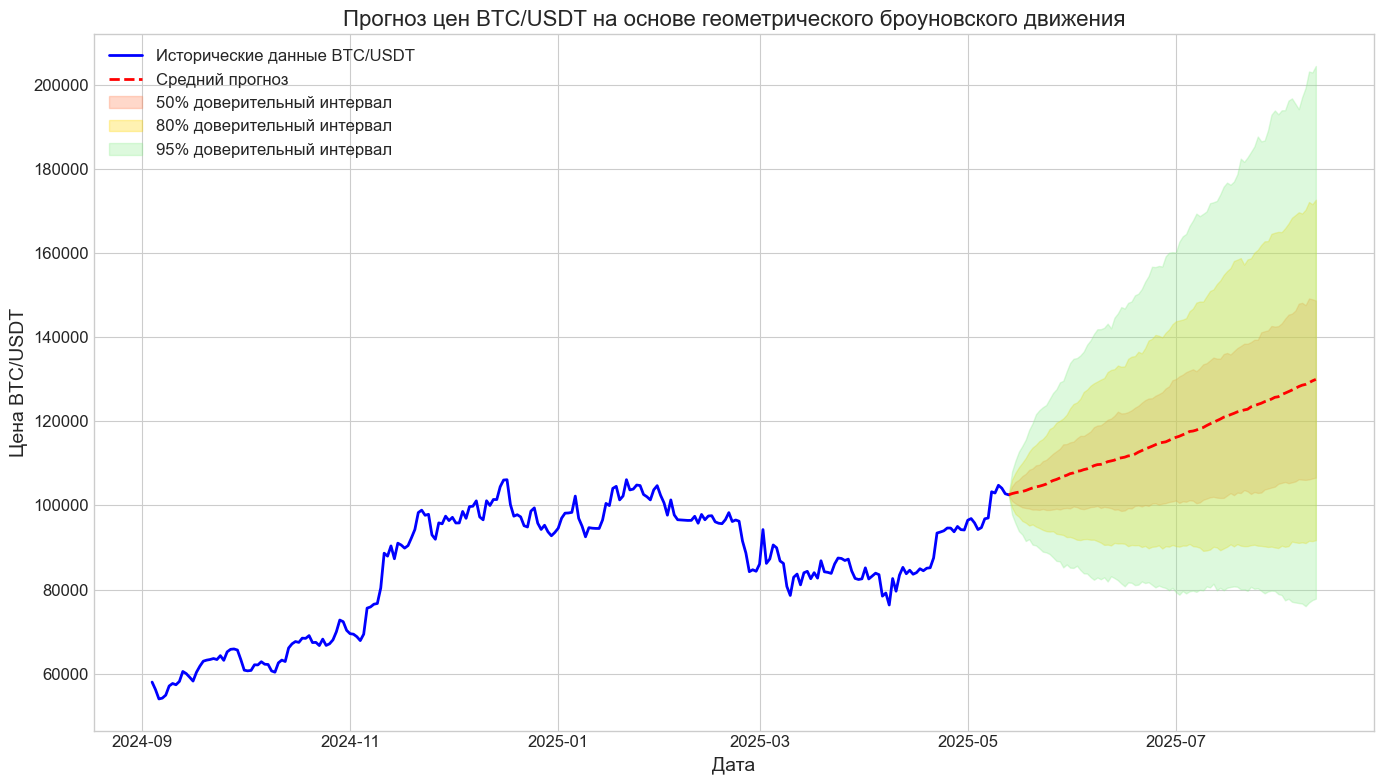


Прогноз цены BTC/USDT через 90 дней:
Текущая цена: 102540.12 USDT
Ожидаемая цена: 130012.07 USDT (изменение: 26.79%)
Медианная цена: 126146.66 USDT
5% персентиль: 83267.07 USDT
25% персентиль: 106639.17 USDT
50% персентиль: 126146.66 USDT
75% персентиль: 148783.47 USDT
95% персентиль: 190298.17 USDT


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import requests

# Настройка стиля графика
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Функция для получения исторических данных BTCUSDT из Binance API
def get_binance_data(symbol='BTCUSDT', interval='1d', limit=252):
    """
    Получение исторических данных с Binance
    
    symbol: торговая пара
    interval: интервал свечей ('1d' = 1 день)
    limit: количество свечей
    """
    url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Преобразуем данные в pandas DataFrame
    df = pd.DataFrame(data, columns=[
        'open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    
    # Конвертируем типы данных
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    
    numeric_columns = ['open', 'high', 'low', 'close', 'volume', 
                        'quote_asset_volume', 'taker_buy_base_asset_volume', 
                        'taker_buy_quote_asset_volume']
    
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    return df

# Получаем реальные данные BTC/USDT
btc_data = get_binance_data(symbol='BTCUSDT', interval='1d', limit=252)
real_prices = btc_data['close'].values

# Подготовка параметров моделирования
np.random.seed(42)  # для воспроизводимости результатов
T = len(real_prices) - 1  # количество торговых дней
N = 5   # количество моделируемых траекторий
dt = 1/252  # один шаг = один торговый день

# Параметры модели
S0 = real_prices[0]  # начальная цена
dates = btc_data['open_time']

# Функция для геометрического броуновского движения
def geometric_brownian_motion(S0, mu, sigma, T, dt, N):
    """
    Моделирование геометрического броуновского движения
    
    S0: начальная цена
    mu: ожидаемая годовая доходность
    sigma: годовая волатильность
    T: период моделирования (в годах)
    dt: размер временного шага
    N: количество траекторий
    """
    steps = int(T / dt)  # количество шагов
    
    # Создаем массив для хранения всех моделируемых траекторий
    S = np.zeros((steps + 1, N))
    time = np.zeros(steps + 1)
    
    # Начальные условия
    S[0] = S0
    
    # Генерируем траектории
    for t in range(1, steps + 1):
        time[t] = t * dt
        # Случайный шок из нормального распределения
        z = np.random.normal(0, 1, N)
        # Формула для геометрического броуновского движения
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    
    return time, S

# Функция для расчета доходностей
def calculate_returns(prices):
    """Расчет дневных доходностей"""
    returns = np.diff(prices) / prices[:-1]
    return returns

# Рассчитываем доходности и параметры для моделирования
btc_returns = calculate_returns(real_prices)
mu = np.mean(btc_returns) * 252  # годовая доходность
sigma = np.std(btc_returns) * np.sqrt(252)  # годовая волатильность

# Моделируем несколько траекторий
time, gbm_prices = geometric_brownian_motion(S0, mu, sigma, 1, dt, N)

# Обрезаем данные до длины реальных данных
if len(gbm_prices) > len(real_prices):
    gbm_prices = gbm_prices[:len(real_prices), :]
    time = time[:len(real_prices)]

# Сравнение ГБД с реальными данными
plt.figure(figsize=(14, 8))

# Строим реальные данные
plt.plot(dates, real_prices, 'r-', linewidth=2.5, label='Реальные данные BTC/USDT')

# Строим несколько симуляций ГБД
time, gbm_prices = geometric_brownian_motion(S0, mu, sigma, 1, dt, 3)
if len(gbm_prices) > len(real_prices):
    gbm_prices = gbm_prices[:len(real_prices), :]

for i in range(3):
    plt.plot(dates, gbm_prices[:len(dates), i], '--', linewidth=1.5, alpha=0.7, 
             label=f'ГБД симуляция {i+1}')

plt.title('Сравнение геометрического броуновского движения с данными BTC/USDT', 
          fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена BTC/USDT', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Анализ доходности и волатильности
# Рассчитываем доходности
btc_returns = calculate_returns(real_prices)
gbm_returns = calculate_returns(gbm_prices[:len(real_prices), 0])  # берем первую симуляцию

# Расчет максимальной просадки
def max_drawdown(prices):
    """Расчет максимальной просадки"""
    max_so_far = prices[0]
    max_drawdown = 0
    
    for price in prices:
        if price > max_so_far:
            max_so_far = price
        drawdown = (max_so_far - price) / max_so_far
        max_drawdown = max(max_drawdown, drawdown)
    
    return max_drawdown

btc_dd = max_drawdown(real_prices)
gbm_dd = max_drawdown(gbm_prices[:len(real_prices), 0])

# Прогнозирование цен на основе ГБД
future_days = 90  # прогноз на 90 дней
n_simulations = 1000  # количество симуляций для прогноза

# Оцениваем параметры модели на основе исторических данных
est_mu = np.mean(btc_returns) * 252
est_sigma = np.std(btc_returns) * np.sqrt(252)

# Последняя известная цена
last_price = real_prices[-1]
last_date = dates.iloc[-1]

# Моделируем будущие траектории
_, future_prices = geometric_brownian_motion(last_price, est_mu, est_sigma, 
                                            future_days/252, dt, n_simulations)

# Даты для прогноза
future_dates = [last_date + timedelta(days=i) for i in range(future_days+1)]

# Вычисляем доверительные интервалы
confidence_intervals = {
    50: np.percentile(future_prices, [25, 75], axis=1),
    80: np.percentile(future_prices, [10, 90], axis=1),
    95: np.percentile(future_prices, [2.5, 97.5], axis=1)
}

# Средний прогноз
mean_forecast = np.mean(future_prices, axis=1)

# Визуализация прогноза
plt.figure(figsize=(14, 8))

# Исторические данные
plt.plot(dates, real_prices, 'b-', linewidth=2, label='Исторические данные BTC/USDT')

# Прогноз - средняя линия
plt.plot(future_dates, mean_forecast, 'r--', linewidth=2, label='Средний прогноз')

# Доверительные интервалы
colors = ['coral', 'gold', 'lightgreen']
for i, (conf, (lower, upper)) in enumerate(confidence_intervals.items()):
    plt.fill_between(future_dates, lower, upper, color=colors[i], alpha=0.3,
                    label=f'{conf}% доверительный интервал')

plt.title('Прогноз цен BTC/USDT на основе геометрического броуновского движения', 
          fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена BTC/USDT', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Выводим итоговый прогноз
final_day_prices = future_prices[-1, :]
expected_price = np.mean(final_day_prices)
median_price = np.median(final_day_prices)
percentiles = np.percentile(final_day_prices, [5, 25, 50, 75, 95])

print(f"\nПрогноз цены BTC/USDT через {future_days} дней:")
print(f"Текущая цена: {last_price:.2f} USDT")
print(f"Ожидаемая цена: {expected_price:.2f} USDT (изменение: {(expected_price/last_price - 1):.2%})")
print(f"Медианная цена: {median_price:.2f} USDT")
print(f"5% персентиль: {percentiles[0]:.2f} USDT")
print(f"25% персентиль: {percentiles[1]:.2f} USDT")
print(f"50% персентиль: {percentiles[2]:.2f} USDT")
print(f"75% персентиль: {percentiles[3]:.2f} USDT")
print(f"95% персентиль: {percentiles[4]:.2f} USDT")

## 1 - Как мы сгенерировали каждую ГБД?
1. Мы сгенерировали каждую траекторию геометрического броуновского движения (ГБД) с помощью функции geometric_brownian_motion. Процесс генерации выглядит следующим образом. Начинаем с начальной цены S0 (первая известная цена BTC). Для каждого временного шага применяем формулу:
$S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)$, где:
* S[t-1] - цена на предыдущем шаге
* mu - годовая доходность BTC (средняя доходность * 252)
* sigma - годовая волатильность BTC (стандартное отклонение * sqrt(252))
* dt - временной шаг (1/252 года = 1 торговый день)
* z - случайный шок из нормального распределения N(0,1)

Ключевой аспект: для каждой траектории мы генерируем свой уникальный набор случайных шоков z, что обеспечивает различие между траекториями:
$z = np.random.normal(0, 1, N)  # N разных случайных чисел для N траекторий$

## 2 - Как мы рассчитали прогноз для BTC/USDT?
1. Используем последнюю известную цену Bitcoin как отправную точку: last_price = real_prices[-1]
2. Рассчитываем параметры модели (доходность и волатильность) на основе исторических данных:
* est_mu = np.mean(btc_returns) * 252  # годовая доходность
* est_sigma = np.std(btc_returns) * np.sqrt(252)  # годовая волатильность
3. Генерируем 1000 возможных будущих траекторий цены на следующие 90 дней:
* future_prices = geometric_brownian_motion(last_price, est_mu, est_sigma, future_days/252, dt, n_simulations)
* Для каждого дня в будущем вычисляем: Среднюю цену по всем 1000 траекториям, доверительные интевалы, для конечной точки прогноза вычисляем персентили

## 3 - Что такое персентиль в нашем случае?
Это значение цены Bitcoin, ниже которого будет находиться определенный процент всех прогнозируемых цен
* 5-й персентиль - цена, ниже которой будет только 5% всех прогнозируемых цен. Это пессимистичный сценарий, который будет превзойден с вероятностью 95%
* 25-й персентиль - цена, ниже которой будет 25% всех прогнозов. Это умеренно пессимистичный сценарий
* 50-й персентиль (медиана) - цена, ниже которой будет половина всех прогнозов. Это наиболее центральная оценка
* 75-й персентиль - цена, ниже которой будет 75% всех прогнозов. Это умеренно оптимистичный сценарий
* 95-й персентиль - цена, ниже которой будет 95% всех прогнозов. Это оптимистичный сценарий, который будет превзойден только с вероятностью 5%

Расчет персентилей выполняется с помощью функции np.percentile():
```
percentiles = np.percentile(final_day_prices, [5, 25, 50, 75, 95])
```
 
## 4 - Что такое доверительные интервалы в нашем случае?
Это диапазоны цен, в которых с определенной вероятностью будет находиться будущая цена BTC/USDT

* 50% доверительный интервал (между 25-м и 75-м персентилями). С вероятностью 50% цена будет находиться в этом диапазоне. Это наиболее вероятный диапазон цен (центральная часть распределения)
* 80% доверительный интервал (между 10-м и 90-м персентилями). С вероятностью 80% цена будет находиться в этом диапазоне. Шире, чем 50%-й интервал, охватывает больше возможных сценариев
* 95% доверительный интервал (между 2.5-м и 97.5-м персентилями)
#### Мы вычислили эти интервалы на основе распределения цен из 1000 симуляций для каждого дня прогнозного периода
```
confidence_intervals = {
    50: np.percentile(future_prices, [25, 75], axis=1),
    80: np.percentile(future_prices, [10, 90], axis=1),
    95: np.percentile(future_prices, [2.5, 97.5], axis=1)
    }
```

## 5 - Как наш прогноз цены BTC связан с броуновским движением?
* Согласно гипотезе эффективного рынка, цены активов следуют случайному блужданию (random walk), которое математически описывается броуновским движением
* Броуновское движение отражает непредсказуемость рынка — цена в следующий момент зависит от текущей цены плюс случайный шок, который невозможно предсказать. Именно эту случайность мы моделируем через нормально распределенные случайные величины:
```
z = np.random.normal(0, 1, N)
```
* Поскольку модель основана на случайном процессе, наш прогноз не дает одно конкретное значение, а целое распределение возможных цен с их вероятностями. Это отражает фундаментальную непредсказуемость рынка

# Зачем используется броуновское движение для крипты?

## 1 - Отражение неопределенности и случайности — криптовалютные рынки крайне непредсказуемы, и ГБД хорошо моделирует их случайный характер
## 2 - Вероятностное прогнозирование — вместо одной прогнозной цены ГБД дает распределение возможных цен с их вероятностями
## 3 - Учет волатильности — криптовалюты известны своей высокой волатильностью, которую ГБД учитывает через параметр σ (сигма)
## 4 - Масштабирование риска со временем — ГБД показывает, как неопределенность растет с увеличением временного горизонта
## 5 - Оценка рисков — модель позволяет количественно оценить риски, рассчитать вероятности падений и возможных потерь

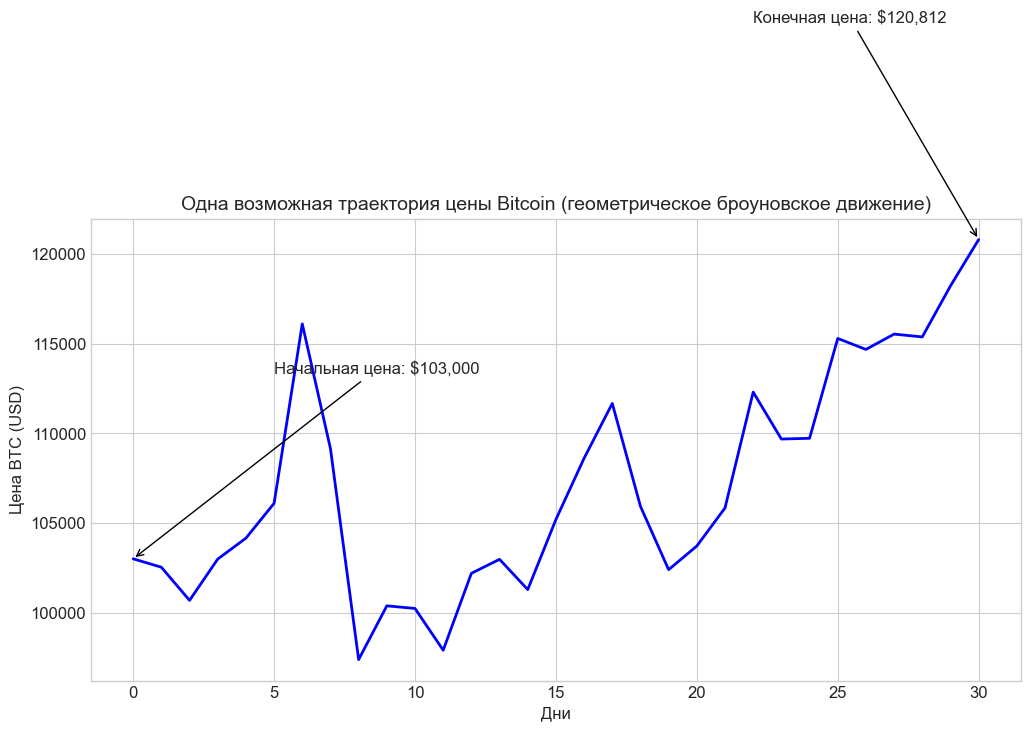

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Начальные параметры
initial_price = 103000  # Начальная цена BTC в USD
days = 30              # Горизонт прогнозирования (дней)
mu = 0.50              # Годовая доходность (50%)
sigma = 0.80           # Годовая волатильность (80%)
dt = 1/365             # Шаг времени (1 день в долях года)

# Функция для генерации одной траектории ГБД
def simple_gbm(S0, mu, sigma, days, dt):
    # Создаем массив для хранения цен
    prices = np.zeros(days + 1)
    prices[0] = S0  # Начальная цена
    
    # Генерируем траекторию
    for day in range(1, days + 1):
        # Случайный шок из нормального распределения
        z = np.random.normal(0, 1)
        
        # Формула ГБД (геометрического броуновского движения)
        prices[day] = prices[day-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    
    return prices

# Генерируем траекторию
btc_prices = simple_gbm(initial_price, mu, sigma, days, dt)

# Создаем даты для оси X
dates = np.arange(days + 1)

# Визуализируем результат
plt.figure(figsize=(12, 6))
plt.plot(dates, btc_prices, 'b-', linewidth=2)
plt.title('Одна возможная траектория цены Bitcoin (геометрическое броуновское движение)', fontsize=14)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Цена BTC (USD)', fontsize=12)
plt.grid(True)

# Отмечаем начальную и конечную цены
plt.annotate(f'Начальная цена: ${initial_price:,.0f}', 
             xy=(0, initial_price), xytext=(5, initial_price*1.1),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Конечная цена: ${btc_prices[-1]:,.0f}', 
             xy=(days, btc_prices[-1]), xytext=(days-8, btc_prices[-1]*1.1),
             arrowprops=dict(arrowstyle='->'))

plt.show()


## Случайное блуждание (Random Walk)

это математическая модель, описывающая путь, состоящий из последовательности случайных шагов в дискретном времени (представление временного параметра в виде отдельных, изолированных точек (моментов), а не непрерывного континуума)

$St+1​=St​⋅(1+μ⋅Δt+σ⋅Δt​⋅εt​)$, где:

* $St​$ — цена актива в момент времени tt
* $μ$ (мю) — ожидаемая доходность (дрифт)
* $σ$ — волатильность
* $Δt$ — шаг времени
* $εt$ — случайная величина из стандартного нормального распределения N(0,1)N(0,1)
N(0,1)

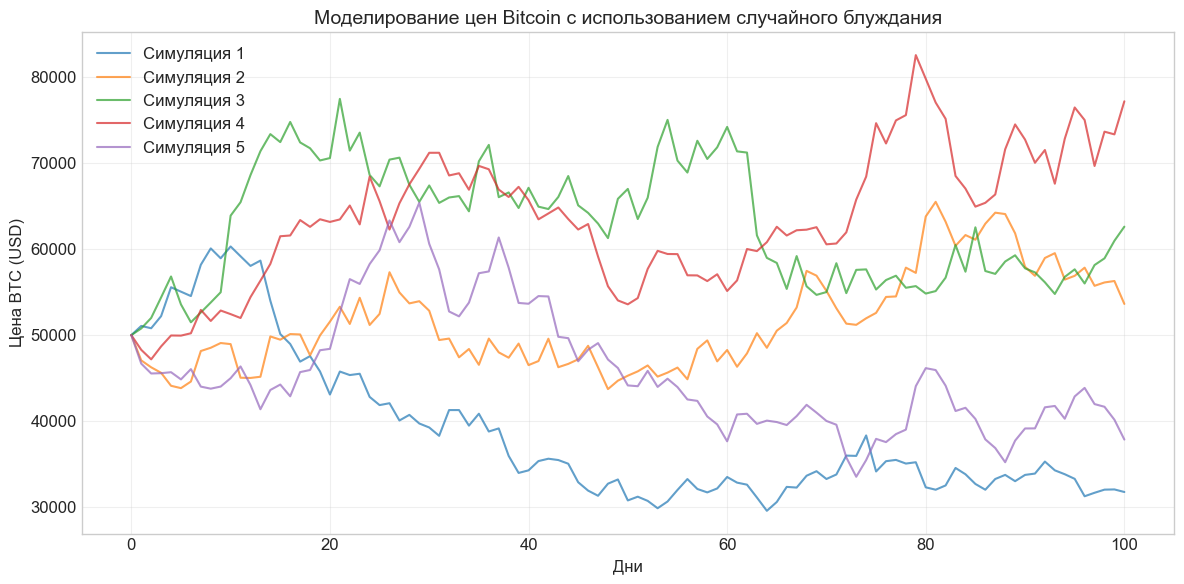

Симуляция 1: Конечная цена = $31773.84, Изменение = -36.45%
Симуляция 2: Конечная цена = $53625.07, Изменение = 7.25%
Симуляция 3: Конечная цена = $62600.95, Изменение = 25.20%
Симуляция 4: Конечная цена = $77167.29, Изменение = 54.33%
Симуляция 5: Конечная цена = $37866.52, Изменение = -24.27%


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
initial_price = 50000    # Начальная цена BTC (USD)
days = 100               # Период моделирования (дни)
mu = 0.20                # Годовая ожидаемая доходность (20%)
sigma = 0.80             # Годовая волатильность (80%)
dt = 1                   # Шаг времени (1 день)

# Функция для моделирования геометрического случайного блуждания
def random_walk(S0, mu, sigma, days, dt):
    # Создаем массив для хранения цен
    prices = np.zeros(days + 1)
    prices[0] = S0
    
    # Генерируем траекторию
    for t in range(1, days + 1):
        # Случайный шок из нормального распределения
        epsilon = np.random.normal(0, 1)
        
        # Формула геометрического случайного блуждания (дискретная форма)
        prices[t] = prices[t-1] * (1 + (mu/365)*dt + (sigma/np.sqrt(365))*np.sqrt(dt)*epsilon)
    
    return prices

# Моделируем несколько траекторий
np.random.seed(42)  # Для воспроизводимости
n_simulations = 5
all_prices = np.zeros((days + 1, n_simulations))

for i in range(n_simulations):
    all_prices[:, i] = random_walk(initial_price, mu, sigma, days, dt)

# Визуализация результатов
plt.figure(figsize=(12, 6))
time = np.arange(days + 1)

for i in range(n_simulations):
    plt.plot(time, all_prices[:, i], alpha=0.7, linewidth=1.5, 
             label=f'Симуляция {i+1}')

plt.title('Моделирование цен Bitcoin с использованием случайного блуждания', fontsize=14)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Цена BTC (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Выводим конечные цены
for i in range(n_simulations):
    final_price = all_prices[-1, i]
    change_pct = (final_price / initial_price - 1) * 100
    print(f"Симуляция {i+1}: Конечная цена = ${final_price:.2f}, Изменение = {change_pct:.2f}%")

## Различия между случайным блужданием и броуновским движением
* Случайное блуждание определено в дискретные моменты времени (t = 0, 1, 2, ...), а броуновское движение определено в непрерывном времени (t ∈ [0, ∞))
* Размер шагов: В классическом случайном блуждании размер шага фиксирован, в броуновском движении "размер шага" бесконечно мал
* Распределение приращений (это изменение значения функции или случайного процесса между двумя моментами времени): Случайное блуждание может иметь различные распределения приращений, броуновское движение всегда имеет нормально распределенные приращения

In [3]:
from IPython.display import Image

Image(url='https://media.springernature.com/full/springer-static/cover-hires/book/978-3-030-78939-8')
